<a href="https://colab.research.google.com/github/RodriCalle/ComplejidadAlgoritmica/blob/main/9_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Depth First Search (sigue el camino por el primer hijo que se cruza)

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd

In [2]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[], layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [3]:
def dfs(G, start):
  n = len(G)
  visited = [False] * n
  parents = [None] * n

  def _dfs(u):  #funcion embebida
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        parents[v] = u
        _dfs(v)
            
      
  _dfs(start)
  return parents

In [4]:
%%file 1.in
1 2 4 7
0 4 5
0
6 10
0 1 5
1 4 6 8
3 5 9
0 8 14
5 7
6 10 12 13
3 9 13 17
12 15
9 11 15 16
9 10
7 15
11 12 14 16
12 15 17
10 16

Writing 1.in


In [5]:
G, _ = readAdjl("1.in")
for i, edges in enumerate(G):
  print(f"{i:2}:{edges}")

 0:[1, 2, 4, 7]
 1:[0, 4, 5]
 2:[0]
 3:[6, 10]
 4:[0, 1, 5]
 5:[1, 4, 6, 8]
 6:[3, 5, 9]
 7:[0, 8, 14]
 8:[5, 7]
 9:[6, 10, 12, 13]
10:[3, 9, 13, 17]
11:[12, 15]
12:[9, 11, 15, 16]
13:[9, 10]
14:[7, 15]
15:[11, 12, 14, 16]
16:[12, 15, 17]
17:[10, 16]


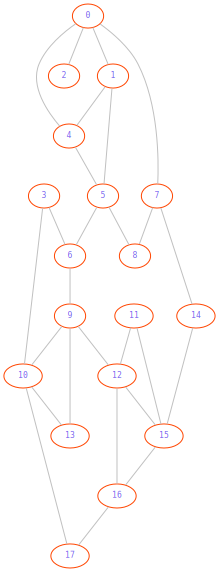

In [6]:
adjlShow(G, layout="dot")

In [7]:
relations = dfs(G, 6)
print(f"Padres = {relations}")
for i in range(len(relations)):
  print(f"Hijo: {i} <- Padre: {relations[i]}")

Padres = [7, 0, 0, 6, 1, 4, None, 14, 5, 10, 3, 12, 9, 9, 15, 11, 15, 16]
Hijo: 0 <- Padre: 7
Hijo: 1 <- Padre: 0
Hijo: 2 <- Padre: 0
Hijo: 3 <- Padre: 6
Hijo: 4 <- Padre: 1
Hijo: 5 <- Padre: 4
Hijo: 6 <- Padre: None
Hijo: 7 <- Padre: 14
Hijo: 8 <- Padre: 5
Hijo: 9 <- Padre: 10
Hijo: 10 <- Padre: 3
Hijo: 11 <- Padre: 12
Hijo: 12 <- Padre: 9
Hijo: 13 <- Padre: 9
Hijo: 14 <- Padre: 15
Hijo: 15 <- Padre: 11
Hijo: 16 <- Padre: 15
Hijo: 17 <- Padre: 16


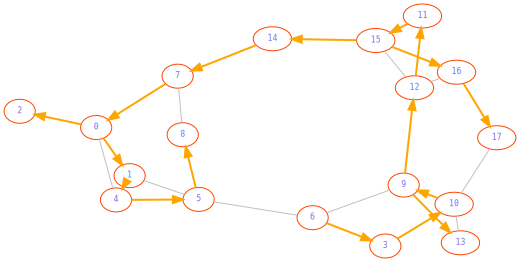

In [8]:
adjlShow(G, path=relations)